# 선형회귀 Linear Regression

## 1. 개요
- 직선 그래프 주변의 데이터(점) 들이 그래프로 돌아가려고 하는 것처럼 보여서 붙여짐
- 종속 변수 ( y )와 하나 이상의 독립 변수 ( x ) 간의 선형 관계를 모델링하는 기법
- 이 방법은 주로 예측 및 회귀 분석에 사용
### Y = b0 + b1X + e
- X, Y는 일차함수의 변수라고 생각했을 때
- 베타1 : 일차함수의 기울기, 회귀 계수
- 베타0 : 일차함수의 절편, 편향Bias
- 입실론 : X와 Y를 베타0, 1을 이용해 관계를 정의한다고 해도 100%정의할 수 없음
임의의 직선이 모든 데이터(점)을 설명할 수 없기 때문에 점과 직선 사이에 차이가 존재하고 그것을 Error라고 함
    - 에러 = 실제 데이터 -  예측 데이터

## 2. 목적

- 선형 회귀의 목적은 독립 변수 ( x )로부터 종속 변수 ( y )를 예측하는 것
- 이를 위해 오차항 ( \epsilon )이 최소화되도록 하는 최적의 ( \beta_0 )와 ( \beta_1 ) 값을 찾음

In [14]:
import numpy as np
# 데이터 셋
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
# 과적합 방지
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

# 훈련세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

Text(0, 0.5, 'Weight (g)')

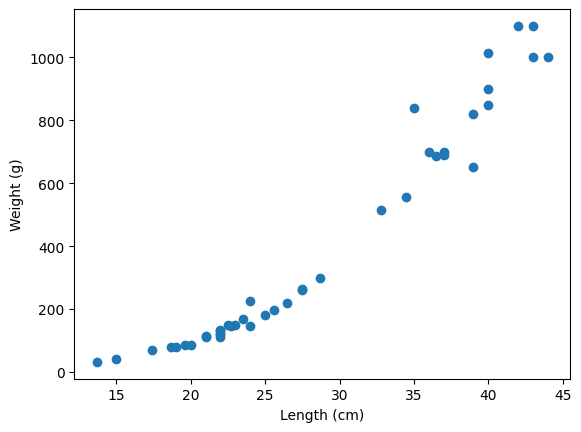

In [3]:
import matplotlib.pyplot as plt

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 임의의 length에 대해 weight 예측
print(lr.predict([[50]]))

[1241.83860323]


In [5]:
# 가중치와 편향
print(lr.coef_[0], lr.intercept_)

39.01714496363019 -709.0186449535474


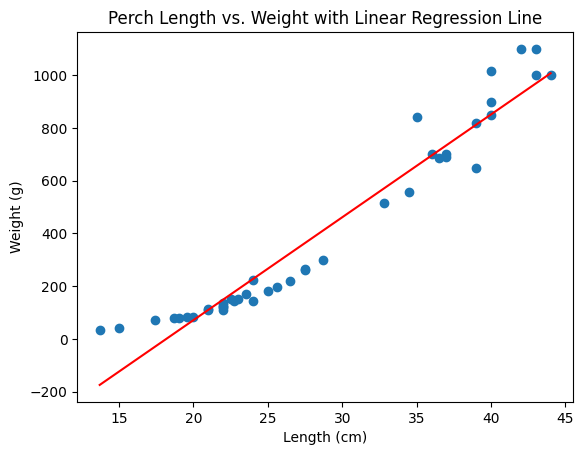

In [6]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 선형 회귀 직선 추가
x_range = np.linspace(train_input.min(), train_input.max(), 100).reshape(-1, 1)
plt.plot(x_range, lr.predict(x_range), color='red')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Perch Length vs. Weight with Linear Regression Line')
plt.show()

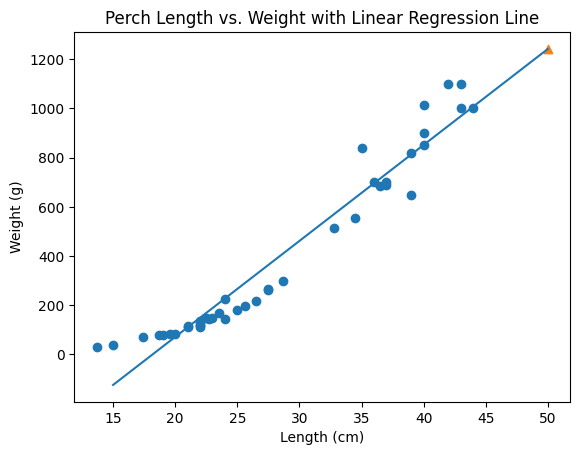

In [7]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# x축 범위 지정한 1차 방정식 그래프 - 예측 데이터를 위함
# x 값과 y값
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 위에서 예측한 x = 50, y = 1241.8 대입
plt.scatter(50, 1241.8, marker = '^')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Perch Length vs. Weight with Linear Regression Line')
plt.show()

In [8]:
# 결정 계수 R^2
# 모델의 성능을 평가하는 지표
# 1에 가까울 수록 모델이 데이터를 잘 설명함

# 훈련 세트
print('훈련 세트 : ', lr.score(train_input, train_target))

# 테스트 세트
print('테스트 세트 : ' , lr.score( test_input, test_target))

훈련 세트 :  0.9398463339976041
테스트 세트 :  0.824750312331356


# 결과 해석

- R^2 값이 1에 가깝게 나왔기 때문에 해당 모델은 데이터를 잘 성명하고 있다고 판단
- 일반적으로 훈련 세트에서 높은 R² 값을 얻으면서 테스트 세트에서도 유사한 성능 보인다면,
- 모델이 잘 일반화되었다고 할 수 있음
- 반면, 훈련 세트에서 높은 R² 값을 얻지만 테스트 세트에서 낮은 R² 값을 얻는다면, 
- 모델이 과적합(overfitting)되었을 가능성

# 교차 검증(cross-validation)

- 모델의 성능을 평가하기 위해 데이터를 여러 번 나누어 훈련하고 테스트하는 방법
- 일반적으로 k-겹 교차 검증(k-fold cross-validation)이 사용
- 모델이 데이터에 과적합되지 않고 일반화 성능이 좋은지 확인

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split

교차 검증 점수: [0.96652696 0.98515566 0.98087133 0.90037229 0.97954127]
평균 교차 검증 점수: 0.9624935025070958


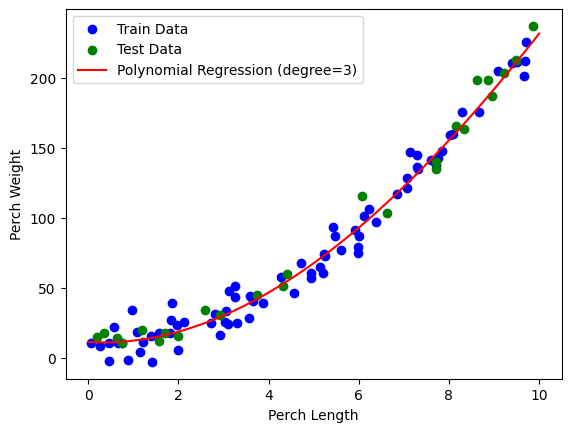

In [17]:
# 임시 데이터 만들기
np.random.seed(42)
perch_length = np.random.rand(100, 1) * 10
perch_weight = 2 * perch_length**2 + 3 * perch_length + 5 + np.random.randn(100, 1) * 10

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 다항 회귀 모델 생성 
# 3차 다항식 생성
degree = 3
# PolynomialFeatures(degree) n차 다항식 형태로 변환
# Ridge(alpha=1.0) 릿지 회귀 모델을 사용하여 정규화
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(poly_model, train_input, train_target, cv=kf, scoring='r2')

# 교차 검증 결과 출력
# R^2
print("교차 검증 점수:", cv_scores)
# 평균 R^2
print("평균 교차 검증 점수:", np.mean(cv_scores))

# 모델 훈련 (전체 훈련 데이터)
poly_model.fit(train_input, train_target)

# 예측
# 0 ~ 10까지 100개의 점 생성
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
# 훈련된 모델을 이용해 X_range의 예측값 생성
y_pred = poly_model.predict(X_range)

# 시각화
plt.scatter(train_input, train_target, color='blue', label='Train Data')
plt.scatter(test_input, test_target, color='green', label='Test Data')
plt.plot(X_range, y_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('Perch Length')
plt.ylabel('Perch Weight')
plt.legend()
plt.show()

### 결과 해석
교차 검증 점수 R^2: [0.96652696 0.98515566 0.98087133 0.90037229 0.97954127]
평균 교차 검증 점수: 0.9624935025070958

- 두 값 모두 1에 가까운 점수이기 때문에 높은 예측력을 가진다고 볼 수 있음
- 하지만 R^2 값이 엄청 높기 때문에 데이터 과적합overfitting을 의심해 봐야함